In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)


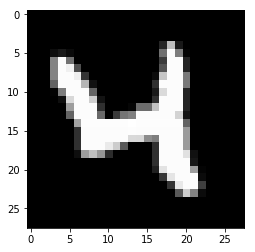

In [2]:
# download and load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[20], cmap='gray')
plt.show()

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('Training Set: ', x_train.shape[0])
print('Test Set:', x_test.shape[0])

Training Set:  60000
Test Set: 10000


In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train) # 10 classes
y_test = keras.utils.to_categorical(y_test)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [5]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # 10 classes

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
 batch_size=128,
 epochs=10,
 verbose=1,
 validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 43s 802us/step - loss: 0.2690 - acc: 0.9188 - val_loss: 0.0966 - val_acc: 0.9698
Epoch 2/10
54000/54000 [==============================] - 47s 871us/step - loss: 0.1000 - acc: 0.9701 - val_loss: 0.0804 - val_acc: 0.9767
Epoch 3/10
54000/54000 [==============================] - 48s 880us/step - loss: 0.0665 - acc: 0.9797 - val_loss: 0.0674 - val_acc: 0.9808
Epoch 4/10
54000/54000 [==============================] - 45s 832us/step - loss: 0.0482 - acc: 0.9845 - val_loss: 0.0720 - val_acc: 0.9783
Epoch 5/10
54000/54000 [==============================] - 45s 840us/step - loss: 0.0382 - acc: 0.9879 - val_loss: 0.0641 - val_acc: 0.9823
Epoch 6/10
54000/54000 [==============================] - 45s 838us/step - loss: 0.0309 - acc: 0.9896 - val_loss: 0.0674 - val_acc: 0.9815
Epoch 7/10
54000/54000 [==============================] - 46s 848us/step - loss: 0.0257 - acc: 0.9914 - val_loss: 0.0

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Loss: 0.06966674756136526
Accuracy: 0.9823
